In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [56]:
import glob
import os
from skimage import io
import numpy as np
import skimage.restoration as sr

import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
def get_file_name_dir(rootDir, ext):
 
    return glob.glob1(rootDir, "*." + ext)

In [48]:
input_path = 'data/data1/'
input_extension = 'png'

filenames = sorted(get_file_name_dir(input_path, input_extension))

In [49]:
filenames

['image_108_9688536.png',
 'image_108_9927451.png',
 'image_109_1182720.png',
 'image_109_2261773.png',
 'image_109_2523680.png',
 'image_109_2777195.png',
 'image_110_5750537.png',
 'image_110_9369180.png',
 'image_110_9593766.png',
 'image_110_9821938.png',
 'image_110_9927595.png']

In [50]:
images = []
for filename in filenames :
    filepath = os.path.join(input_path,filename)
    image = io.imread(filepath, "L")
    images.append(image)
    print(filename)

image_108_9688536.png
image_108_9927451.png
image_109_1182720.png
image_109_2261773.png
image_109_2523680.png
image_109_2777195.png
image_110_5750537.png
image_110_9369180.png
image_110_9593766.png
image_110_9821938.png
image_110_9927595.png


In [52]:
hval = 10
alpha = 15
beta = 1

In [53]:
def denoiseImage(image):
    maxvalue = np.max(image)
    newimage = image*(255.0/maxvalue).astype(np.uint8)
    denoised = sr.denoise_nl_means(newimage, multichannel=False, h=hval)
    denoised = denoised - (alpha*beta)
    denoised[denoised<0]=0
    denoised = denoised.astype(np.uint8)
    denoisedimages.append(denoised)

In [54]:
denoisedimages = []
for image in images:
    denoiseImage(image)

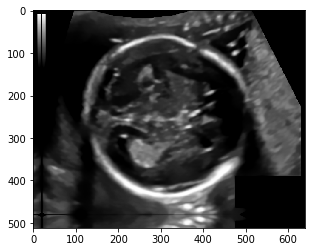

In [57]:
plt.imshow(denoisedimages[0],cmap="gray")

In [ ]:
for item in range(len(images)):
    imsave('denoised/denoised_'+str(item+1)+'.png',denoisedimages[item])